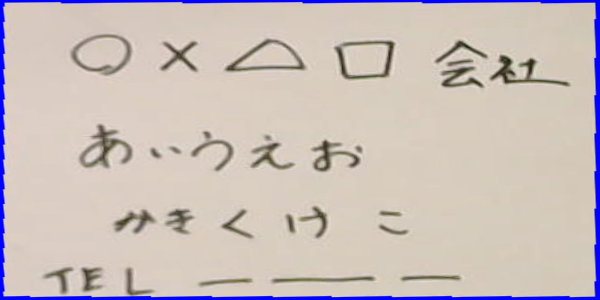

In [5]:
import cv2
import numpy as np
from skimage.transform import rotate, resize
from IPython.display import display, Image

def display_cv_image(image, format='.png'):
    decoded_bytes = cv2.imencode(format, image)[1].tobytes()
    display(Image(data=decoded_bytes))


#画像取得
capture = cv2.VideoCapture(0)

while(True):
    ret, frame = capture.read()


# 二値化
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    ret,th1 = cv2.threshold(gray,200,255,cv2.THRESH_BINARY)
    
    
#輪郭抽出
    image, contours, hierarchy = cv2.findContours(th1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 面積の大きいもののみ選別
    areas = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 10000:
            epsilon = 0.1*cv2.arcLength(cnt,True)
            approx = cv2.approxPolyDP(cnt,epsilon,True)
            areas.append(approx)
    
    cv2.drawContours(frame,areas,-1,(255,0,0),3)
    cv2.imshow('scanner', frame)
    

#キャプチャ終了
    k = cv2.waitKey(1)
    if k == ord('q') or k == 27:
        break


#読み取った名刺を表示
dst = []

pts1 = np.float32(areas[0])
pts2 = np.float32([[600,300],[600,0],[0,0],[0,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(frame,M,(600,300))

rota = rotate(dst, angle=180, preserve_range=True)

display_cv_image(rota)

capture.release()
cv2.destroyAllWindows()

